## PHSX 815 HW 12


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
# from tensorflow.keras.optimizers import SGD, Adam
# from tensorflow.keras.activations import relu
import tensorflow_datasets as tfds
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pylab import rcParams
from sklearn import preprocessing

print("Lib loaded successfully !!")


Lib loaded successfully !!


**1 .Reading Raw Data using Panda Dataframe**

In [ ]:
# Loading the file in pandas dataFrame 
## Loading all data in four different pandas dataframe 
## Printing the data 
university_data_df = pd.read_excel("IPEDS_data.xlsx")
print("University data loaded ...............")
university_data_df.head(2)

University data loaded ...............


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time",...,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate enrollment that are White,Percent of graduate enrollment that are two or more races,Percent of graduate enrollment that are Race/ethnicity unknown,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of graduate enrollment that are women,Number of first-time undergraduates - in-state,Percent of first-time undergraduates - in-state,Number of first-time undergraduates - out-of-state,Percent of first-time undergraduates - out-of-state,Number of first-time undergraduates - foreign countries,Percent of first-time undergraduates - foreign countries,Number of first-time undergraduates - residence unknown,Percent of first-time undergraduates - residence unknown,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,NaN,NaN,15.0,19.0,5024.0,4442.0,582.0,4055.0,3802.0,253.0,...,3.0,0.0,1.0,0.0,0.0,51.0,0.0,2.0,81.0,1.0,0.0,15.0,0.0,1.0,0.0,2.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,23.0,29.0,9

**2. Data Analysis and Preprocessing**

In [ ]:
# Looking into the data columns we have;
count = 1
for col in university_data_df.columns:
  print(count, '|', col, " | ",university_data_df[str(col)][0])
  count+=1

1 | ID number  |  100654
2 | Name  |  Alabama A & M University
3 | year  |  2013
4 | ZIP code  |  35762
5 | Highest degree offered  |  Doctor's degree - research/scholarship
6 | County name  |  Madison County
7 | Longitude location of institution  |  -86.568502
8 | Latitude location of institution  |  34.783368
9 | Religious affiliation  |  Not applicable
10 | Offers Less than one year certificate  |  Implied no
11 | Offers One but less than two years certificate  |  Implied no
12 | Offers Associate's degree  |  Implied no
13 | Offers Two but less than 4 years certificate  |  Implied no
14 | Offers Bachelor's degree  |  Yes
15 | Offers Postbaccalaureate certificate  |  Implied no
16 | Offers Master's degree  |  Yes
17 | Offers Post-master's certificate  |  Implied no
18 | Offers Doctor's degree - research/scholarship  |  Yes
19 | Offers Doctor's degree - professional practice  |  Implied no
20 | Offers Doctor's degree - other  |  Implied no
21 | Offers Other degree  |  Implied no
22 | 

**3. Data Visualization**

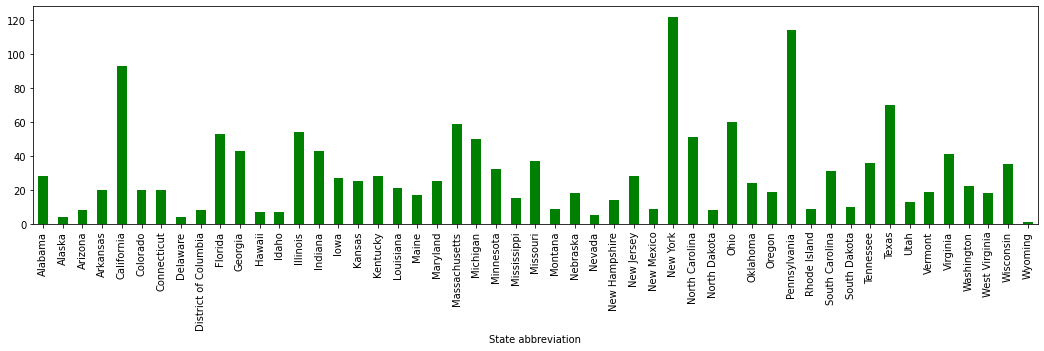

In [ ]:
# Number of Universities by State 
uni_by_state = university_data_df.groupby('State abbreviation')['Name'].count()
uni_by_state.plot.bar(color = 'GREEN',figsize=(18, 4))

**Freshman Data Analysis based on University**

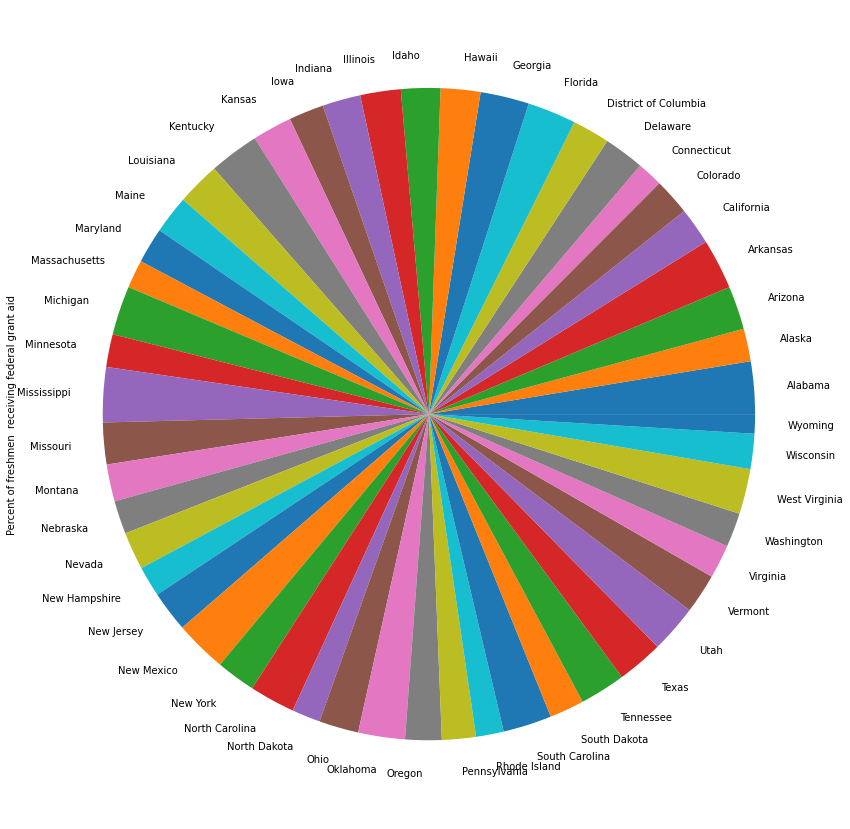

In [ ]:
# Percent of freshmen  receiving federal grant aid -> Averaging based in each state
uni_by_state = university_data_df.groupby('State abbreviation')['Percent of freshmen  receiving federal grant aid'].mean()
uni_by_state.plot.pie(figsize=(20, 15))

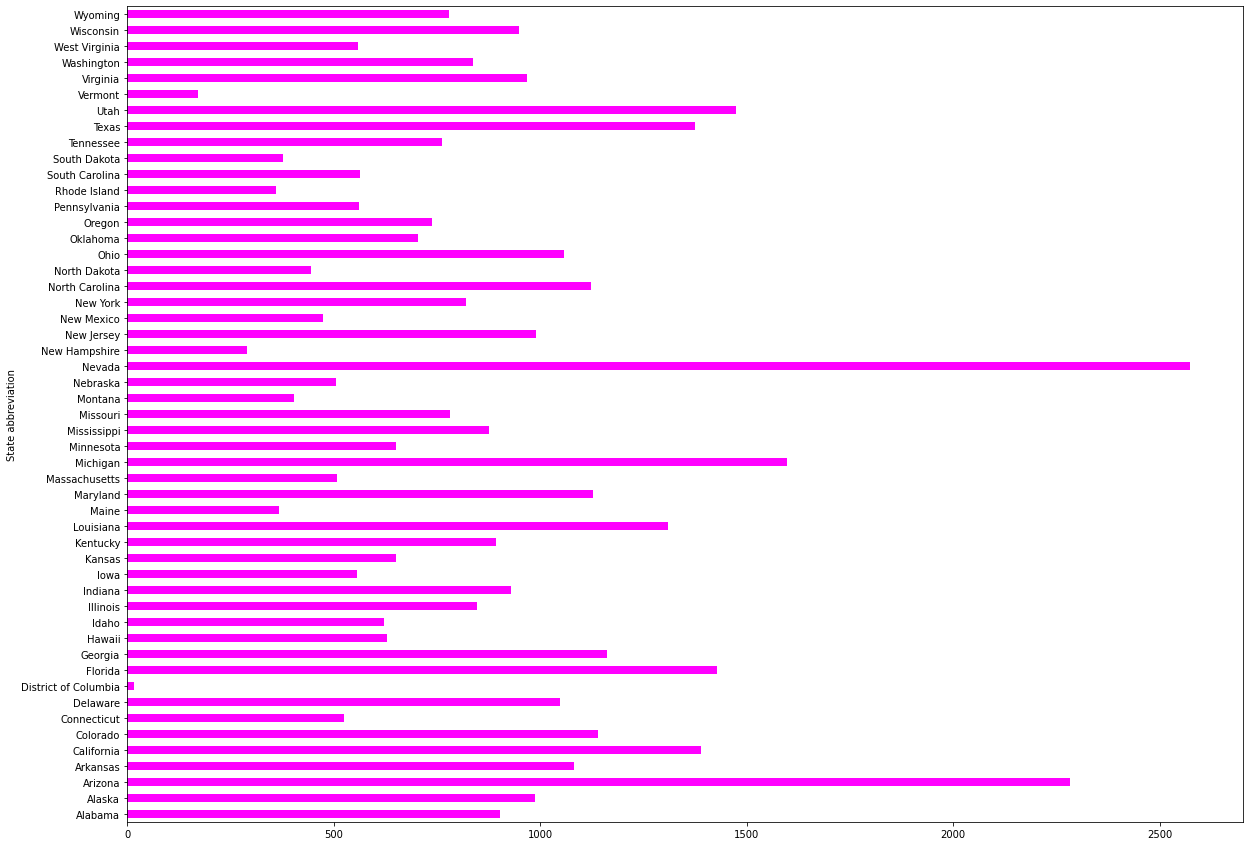

In [ ]:
# Percent of freshmen  receiving federal grant aid -> Averaging based in each state
uni_by_state = university_data_df.groupby('State abbreviation')['Number of first-time undergraduates - in-state'].mean()
uni_by_state.plot.barh(color='magenta' , figsize=(20, 15))

,State abbreviation,mean
0,Alabama,58.714286
1,Alaska,61.750000
2,Arizona,52.500000
3,Arkansas,55.700000
4,California,58.075269


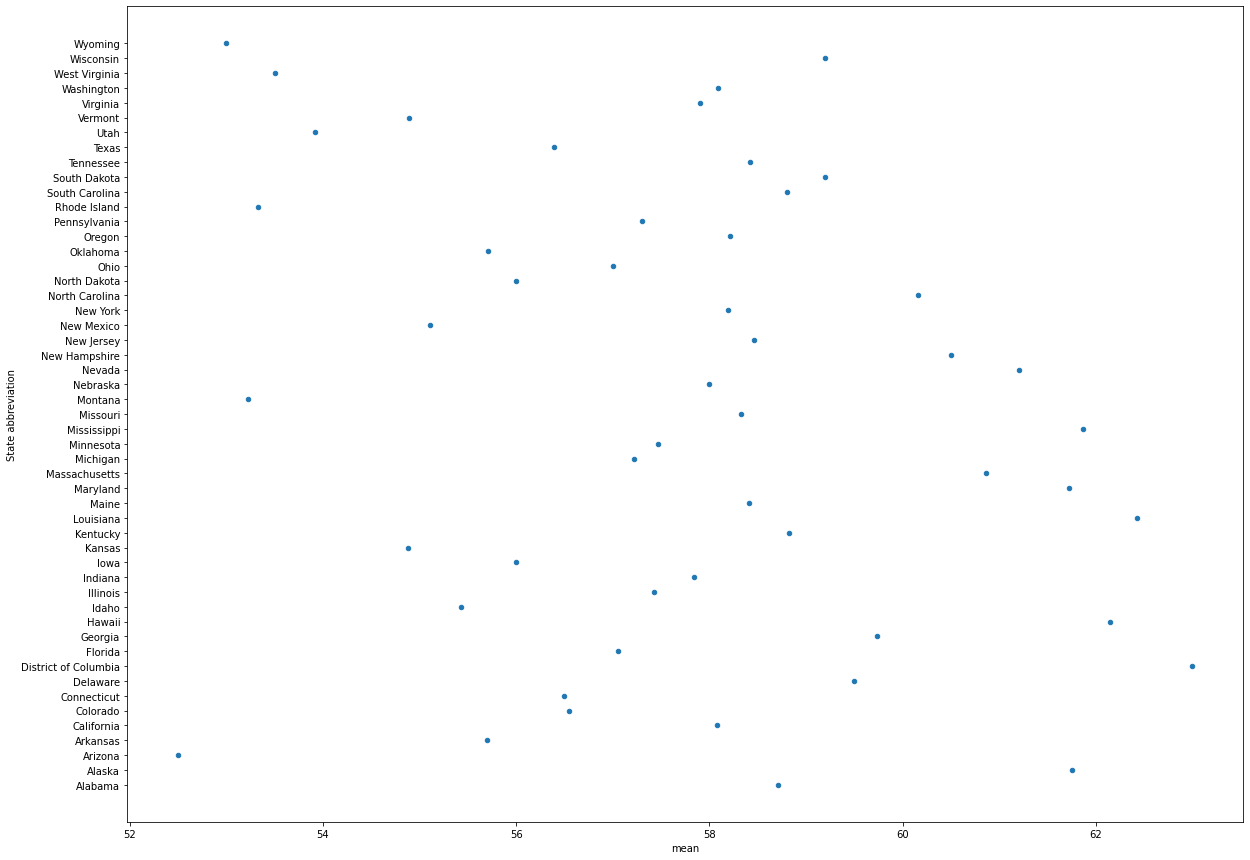

In [ ]:
# Percent of freshmen  receiving federal grant aid -> Averaging based in each state
uni_by_state = university_data_df.groupby('State abbreviation')['Percent of total enrollment that are women'].mean().to_frame(name="mean").reset_index()
uni_by_state.head()
uni_by_state.plot.scatter(colormap='viridis', x = 'mean', y = 'State abbreviation' , figsize=(20, 15))

**4. Preprocessing**
Preprocessig in terms of predicting the total number of applicants. The proprocessing module will define number of features (feature selection), correction 



In [ ]:
# Checking total size of df 
university_data_df.shape

(1534, 145)

In [ ]:
# 
university_data_df.isnull().sum(axis = 0)

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [ ]:
# From domain understanding some of the colums are not related to the target (label) varibales. 
# Lets filter them out 

cols_to_filter = [#'Name',
                  'Religious affiliation',
                  'Applicants total'
                  ,'Admissions total',
                  'State abbreviation',
                  'Percent of undergraduate enrollment that are Nonresident Alien',
                  'Historically Black College or University',
                  'Percent of total enrollment that are Asian',
                  'Percent of total enrollment that are Black or African American',
                  'Percent of total enrollment that are Hispanic/Latino',
                  'Percent of total enrollment that are White',
                  'Percent of freshmen receiving federal, state, local or institutional grant aid',
                  'Percent of total enrollment that are women']
t_admission_df = university_data_df[cols_to_filter]
t_admission_df.head()

,Religious affiliation,Applicants total,Admissions total,State abbreviation,Percent of undergraduate enrollment that are Nonresident Alien,Historically Black College or University,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are White,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of total enrollment that are women
0,Not applicable,6142.0,5521.0,Alabama,0.0,Yes,1.0,92.0,1.0,5.0,89.0,55.0
1,Not applicable,5689.0,4934.0,Alabama,2.0,No,5.0,21.0,3.0,64.0,79.0,61.0
2,Churches of Christ,NaN,NaN,Alabama,0.0,No,0.0,40.0,1.0,30.0,90.0,58.0
3,Not applicable,2054.0,1656.0,Alabama,4.0,No,4.0,12.0,3.0,69.0,77.0,44.0
4,Not applicable,10245.0,5251.0,Alabama,2.0,Yes,0.0,91.0,1.0,3.0,87.0,61.0


In [ ]:
# Checking Null data 
t_admission_df.isnull().sum(axis = 0)

Religious affiliation                                                               2
Applicants total                                                                  157
Admissions total                                                                  157
State abbreviation                                                                  0
Percent of undergraduate enrollment that are Nonresident Alien                     12
Historically Black College or University                                            0
Percent of total enrollment that are Asian                                          2
Percent of total enrollment that are Black or African American                      2
Percent of total enrollment that are Hispanic/Latino                                2
Percent of total enrollment that are White                                          2
Percent of freshmen receiving federal, state, local or institutional grant aid     42
Percent of total enrollment that are women            

In [ ]:
t_admission_df = t_admission_df.dropna(axis=0)
t_admission_df.isnull().sum(axis = 0)
t_admission_df.shape

Religious affiliation                                                             0
Applicants total                                                                  0
Admissions total                                                                  0
State abbreviation                                                                0
Percent of undergraduate enrollment that are Nonresident Alien                    0
Historically Black College or University                                          0
Percent of total enrollment that are Asian                                        0
Percent of total enrollment that are Black or African American                    0
Percent of total enrollment that are Hispanic/Latino                              0
Percent of total enrollment that are White                                        0
Percent of freshmen receiving federal, state, local or institutional grant aid    0
Percent of total enrollment that are women                                  

(1373, 12)

In [ ]:
# Label Encoding
le = preprocessing.LabelEncoder()
t_admission_df['Religious affiliation'] = le.fit_transform(t_admission_df['Religious affiliation'] )
t_admission_df['Historically Black College or University'] = le.fit_transform(t_admission_df['Historically Black College or University'] )
# t_admission_df['Name'] = le.fit_transform(t_admission_df['Name'] )
t_admission_df.head()

,Religious affiliation,Applicants total,Admissions total,State abbreviation,Percent of undergraduate enrollment that are Nonresident Alien,Historically Black College or University,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are White,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of total enrollment that are women
0,33,6142.0,5521.0,Alabama,0.0,1,1.0,92.0,1.0,5.0,89.0,55.0
1,33,5689.0,4934.0,Alabama,2.0,0,5.0,21.0,3.0,64.0,79.0,61.0
3,33,2054.0,1656.0,Alabama,4.0,0,4.0,12.0,3.0,69.0,77.0,44.0
4,33,10245.0,5251.0,Alabama,2.0,1,0.0,91.0,1.0,3.0,87.0,61.0
5,33,30975.0,17515.0,Alabama,4.0,0,1.0,11.0,3.0,77.0,60.0,55.0


In [ ]:
# Lets plot a correlation heatmap 
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 20,20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="PuBuGn_r")
    plt.show()
    fig.savefig('corr.png')

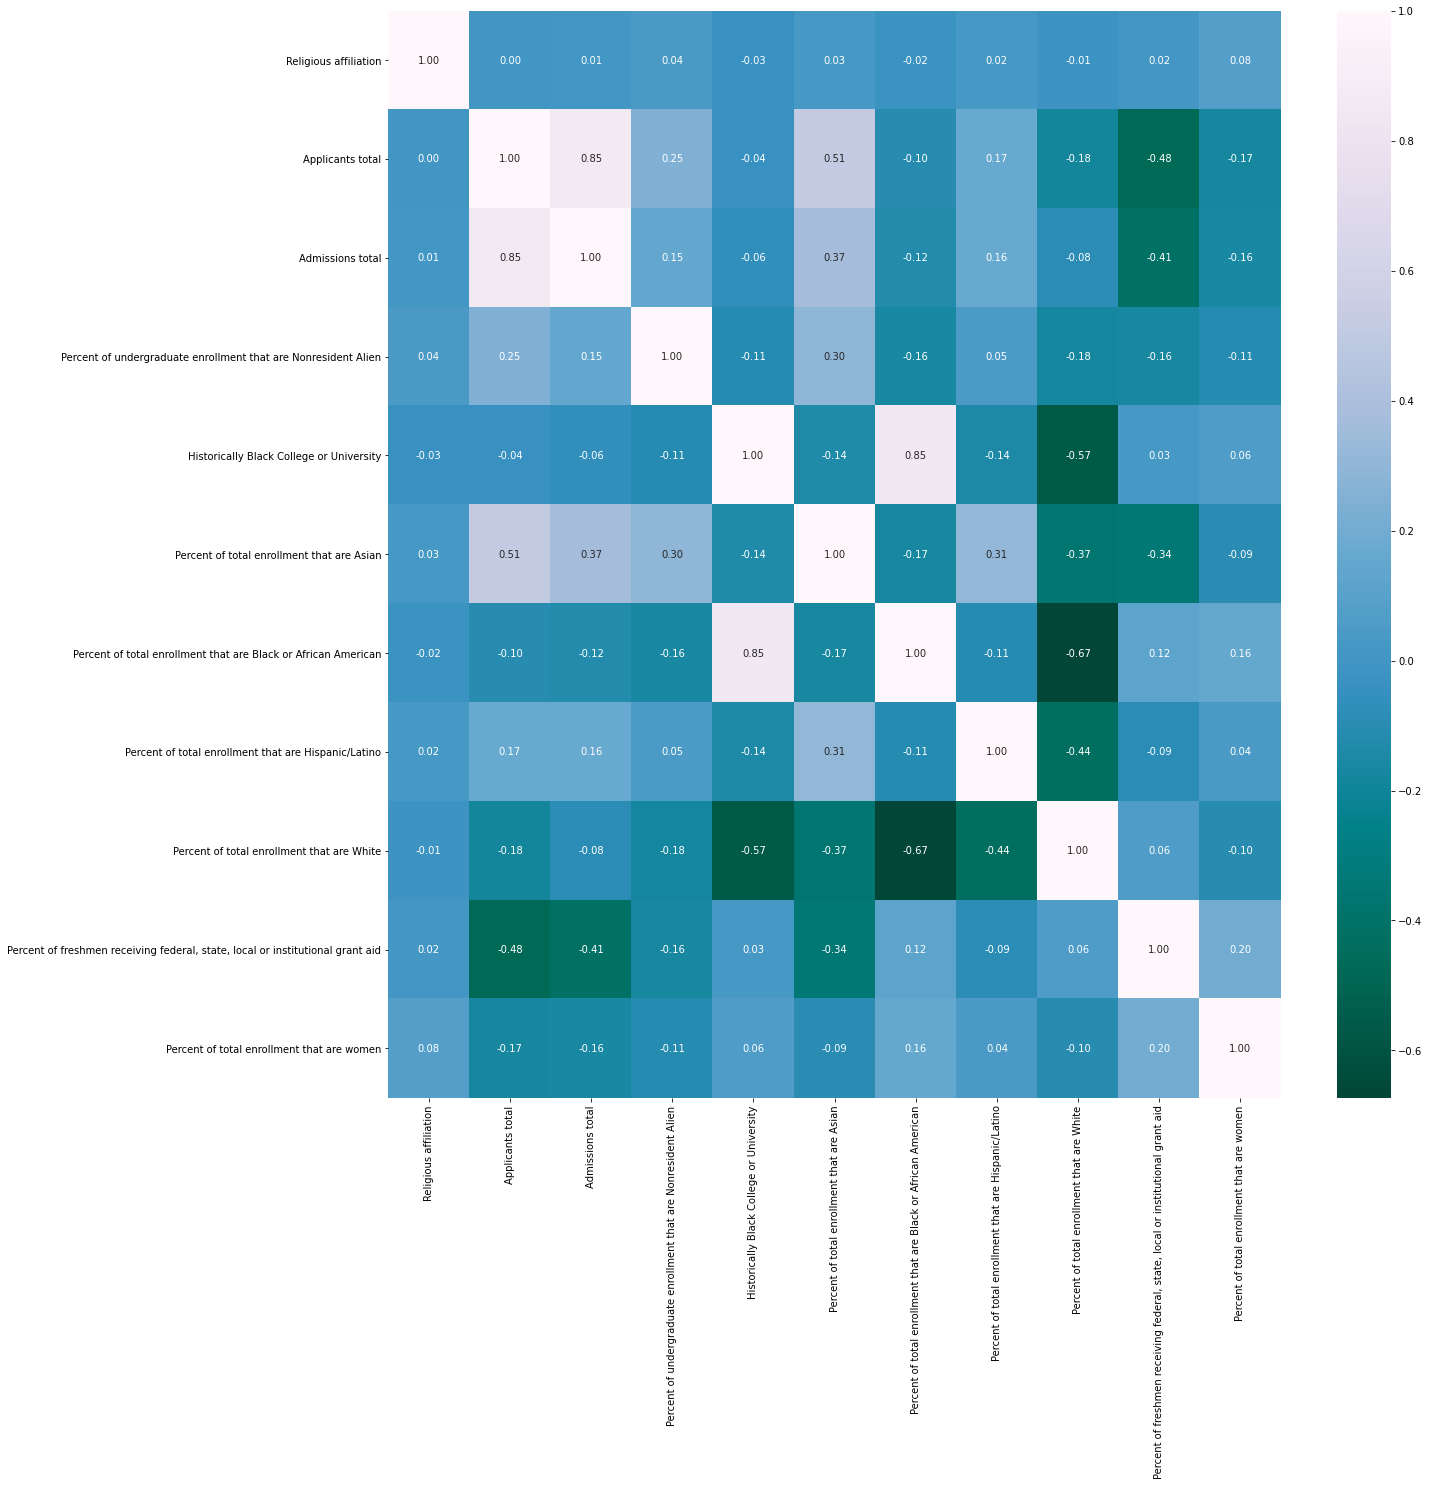

In [ ]:
plot_correlation(t_admission_df)

In [ ]:
t_admission_df.head()

,Religious affiliation,Applicants total,Admissions total,State abbreviation,Percent of undergraduate enrollment that are Nonresident Alien,Historically Black College or University,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are White,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of total enrollment that are women
0,33,6142.0,5521.0,Alabama,0.0,1,1.0,92.0,1.0,5.0,89.0,55.0
1,33,5689.0,4934.0,Alabama,2.0,0,5.0,21.0,3.0,64.0,79.0,61.0
3,33,2054.0,1656.0,Alabama,4.0,0,4.0,12.0,3.0,69.0,77.0,44.0
4,33,10245.0,5251.0,Alabama,2.0,1,0.0,91.0,1.0,3.0,87.0,61.0
5,33,30975.0,17515.0,Alabama,4.0,0,1.0,11.0,3.0,77.0,60.0,55.0


,State abbreviation,mean
0,Alabama,1.545455
1,Alaska,1.000000
2,Arizona,4.166667
3,Arkansas,1.352941
4,California,13.443038


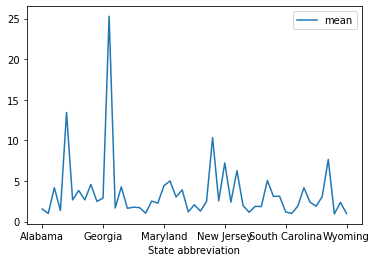

In [ ]:
asian_df = t_admission_df.groupby('State abbreviation')['Percent of total enrollment that are Asian'].mean().to_frame(name="mean").reset_index()
asian_df.head()
asian_df.plot(x='State abbreviation',y='mean')

In [ ]:
t_admission_df['State abbreviation'] = le.fit_transform(t_admission_df['State abbreviation'] )
t_admission_df.head()

,Religious affiliation,Applicants total,Admissions total,State abbreviation,Percent of undergraduate enrollment that are Nonresident Alien,Historically Black College or University,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are White,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of total enrollment that are women
0,33,6142.0,5521.0,0,0.0,1,1.0,92.0,1.0,5.0,89.0,55.0
1,33,5689.0,4934.0,0,2.0,0,5.0,21.0,3.0,64.0,79.0,61.0
3,33,2054.0,1656.0,0,4.0,0,4.0,12.0,3.0,69.0,77.0,44.0
4,33,10245.0,5251.0,0,2.0,1,0.0,91.0,1.0,3.0,87.0,61.0
5,33,30975.0,17515.0,0,4.0,0,1.0,11.0,3.0,77.0,60.0,55.0


In [ ]:
max=t_admission_df.max()
t_admission_df = t_admission_df/max

**4 . Learning From data**

In [ ]:
# Test Train Separation
feature_cols = [
                  'Religious affiliation',
                  'Applicants total',
                  'State abbreviation',
                  'Percent of undergraduate enrollment that are Nonresident Alien',
                  'Historically Black College or University',
                  'Percent of total enrollment that are Asian',
                  'Percent of total enrollment that are Black or African American',
                  'Percent of total enrollment that are Hispanic/Latino',
                  'Percent of total enrollment that are White',
                  'Percent of freshmen receiving federal, state, local or institutional grant aid',
                  'Percent of total enrollment that are women']
target_cols = ['Admissions total']
# Y is target 
# X is feature vector
x_train, x_test, y_train, y_test = train_test_split(t_admission_df[feature_cols], t_admission_df[target_cols],test_size=0.2)

x_train.head() 

,Religious affiliation,Applicants total,State abbreviation,Percent of undergraduate enrollment that are Nonresident Alien,Historically Black College or University,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are White,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of total enrollment that are women
1470,0.634615,0.427693,0.28,0.400,0.0,0.125,0.03,0.043011,0.63,0.47,0.42
598,0.788462,0.057254,0.44,0.050,0.0,0.050,0.02,0.075269,0.85,0.92,0.60
501,0.634615,0.049741,0.40,0.050,0.0,0.050,0.09,0.053763,0.58,0.88,0.69
547,0.634615,0.035844,0.42,0.050,0.0,0.050,0.05,0.053763,0.68,0.96,0.82
844,0.134615,0.009632,0.64,0.125,0.0,0.300,0.32,0.279570,0.20,1.00,0.59


In [ ]:
y_train.head()
nClasses = y_train.shape
print (nClasses)

,Admissions total
1470,0.524333
598,0.084266
501,0.072400
547,0.049086
844,0.018903


(1098, 1)


In [ ]:
nClasses = y_train.shape[1]
nClasses

1

Creation of the model

In [ ]:
# Model
nClasses = y_train.shape[1]
model = Sequential()
model.add(Input(shape=(len(feature_cols),)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(nClasses))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting
history = model.fit(x_train, y_train, validation_split=0.1, verbose=1, epochs=100, batch_size=16, shuffle=True)

Epoch 1/100
62/62 [==============================] - 1s 4ms/step - loss: 0.0252 - val_loss: 0.0069
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0059
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0050
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0051
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0043
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0039
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0037
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0037
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0035
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0039
Epoch 11/

In [ ]:
y_predicted = model.predict(x_test)


In [ ]:

y_test.shape

(275, 1)

In [ ]:
print(y_predicted)
print(y_test)


[[ 2.09146980e-02]
 [ 7.23358691e-02]
 [ 2.60249406e-01]
 [ 7.31967837e-02]
 [ 3.33845988e-02]
 [ 7.14500099e-02]
 [ 1.71867073e-01]
 [ 5.31764217e-02]
 [ 3.76398154e-02]
 [ 7.00162798e-02]
 [ 6.08834065e-02]
 [ 1.55462146e-01]
 [ 4.77063470e-02]
 [ 7.23187029e-02]
 [ 7.05229416e-02]
 [ 3.85656595e-01]
 [ 7.67447613e-03]
 [ 6.48688972e-02]
 [ 6.59386367e-02]
 [ 6.16784021e-02]
 [ 3.68579887e-02]
 [ 4.29061167e-02]
 [ 6.79060966e-02]
 [ 2.03499459e-02]
 [ 1.21747777e-02]
 [ 1.81799948e-01]
 [ 4.34362292e-02]
 [ 7.93262348e-02]
 [ 3.65319215e-02]
 [ 7.69211352e-02]
 [ 4.38839458e-02]
 [ 1.30898863e-01]
 [ 3.65625583e-02]
 [ 6.89010024e-02]
 [ 7.11646974e-02]
 [ 1.13673657e-01]
 [ 8.64198431e-03]
 [ 3.77065986e-01]
 [ 4.34430242e-02]
 [ 2.25668222e-01]
 [ 3.92923132e-02]
 [ 1.79833204e-01]
 [ 3.80283892e-01]
 [ 9.57489386e-03]
 [ 1.81949623e-02]
 [ 4.32191081e-02]
 [ 7.41525590e-02]
 [ 1.64870560e-01]
 [ 2.44113430e-02]
 [ 2.65850313e-02]
 [ 1.92686409e-01]
 [ 1.61282361e-01]
 [ 4.8755221

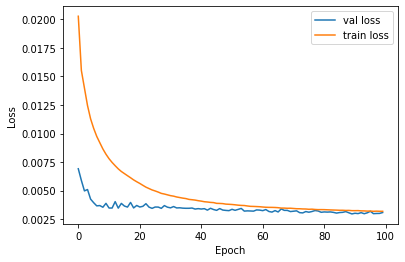

In [ ]:
def show_loss(history):
    plt.figure()
    plt.plot(history.history['val_loss'], label="val loss")
    plt.plot(history.history['loss'],label="train loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    # plt.yscale('log')
    plt.legend()
show_loss(history)

In [ ]:
from sklearn.metrics import r2_score
corScore = r2_score(y_test,y_predicted)
print(corScore)

0.8602953313135957


To plot our results, I just chose the highest probability of the classes and assigned the prediction to a class based on that rounding (highest probability gets a 1, every other class gets a 0). Then, I one-hot decoded the rounded array to get a single number for the class. 

### Overall, 
our network performs ok with a training, validation, and test accuracy all around 50-60%. What could you change about the network or inputs? How do you think that would affect the model's predictions?




I could change number of layers in the network or slice the test and training data differently. I would think incresing number of layer will definately increase the accuracy of the validation. 
